<h2 style="text-align: center; font-size: 24px;">
   ✨ <span style="color: #1E90FF;">THE LÜSCHER ZETA FUNCTION</span> 
    <br>
    <span style="color: #87CEFA;">Intersections with -2</span> ✨
</h2>


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from scipy.interpolate import interp1d
import numpy.ma as ma

Our goal is to find the intersections with the line at -2. $ Z_{0,0}(1; q^2) = -\frac{1}{A} $ where $ A = 0.5 $. Therefore, $ -\frac{1}{A} = -\frac{1}{0.5} = -2 $.

Core Functions (including the Luscher Zeta function copied from our previous notebook). :)

In [ ]:
@njit
def norm_squared(x, y, z):
    return x*x + y*y + z*z

@njit
def Z_00(q2, L_max, epsilon=1e-6, l=0):  # Compute Lüscher Zeta function Z_00
    Z_value = 0.0 + 0.0j

    for x in range(-L_max, L_max + 1):  
        for y in range(-L_max, L_max + 1):
            for z in range(-L_max, L_max + 1):
                r2 = norm_squared(x, y, z)
                if r2 >= L_max**2:
                    continue
                
                if r2 == 0 and abs(q2) >= 1e-12:
                    Z_value += (-1.0 / q2) * r2**(l / 2)
                    continue
                
                denominator = (r2 - q2) + epsilon * 1j
                Z_value += (r2**(l / 2)) / denominator

    return (Z_value.real - 4.*np.pi*L_max) / np.sqrt(4 * np.pi)

# Z_00 for an array of q² values
def compute_Z_values(q2_values, L_max, epsilon=1e-6):
    return np.array([Z_00(float(q2), L_max, epsilon) for q2 in q2_values])


In [ ]:
# Intersections of Z_00(q2) with -2
def get_intersections(q2_values, Z_values, A):
    target_value = -1 / A  # Should be -2 if A = 0.5
    differences = Z_values - target_value  # f(q2) - (-2)

    # Sign changes in Z_values - (-2)
    sign_changes = np.where(np.diff(np.sign(differences)))[0]

    # Interpolate to refine intersection points
    intersections = []
    for i in sign_changes:
        q2_range = q2_values[i:i+2]
        Z_range = Z_values[i:i+2]
        interp = interp1d(Z_range, q2_range, kind='linear', assume_sorted=False)
        q2_intersection = interp(target_value)
        intersections.append(q2_intersection)

    # Remove "intersections" with the solid lines at poles plotted by matplotlib
    poles = np.array([0, 1, 2, 3, 4, 5, 6, 7])
    filtered_intersections = np.array([q2 for q2 in intersections if np.all(np.abs(q2 - poles) > 1e-2)])

    # Print intersections! :)
    if filtered_intersections.size > 0:
        print("\nFiltered Intersections at q² values:")
        for q2_intersection in filtered_intersections:
            print(f"q² = {q2_intersection:.5f}")

    return filtered_intersections

Let's compute and plot!🎨🖌️


Filtered Intersections at q² values:
q² = -0.20005
q² = 0.28579
q² = 1.36487
q² = 2.56716
q² = 3.46807
q² = 4.21983
q² = 5.51334
q² = 7.12183


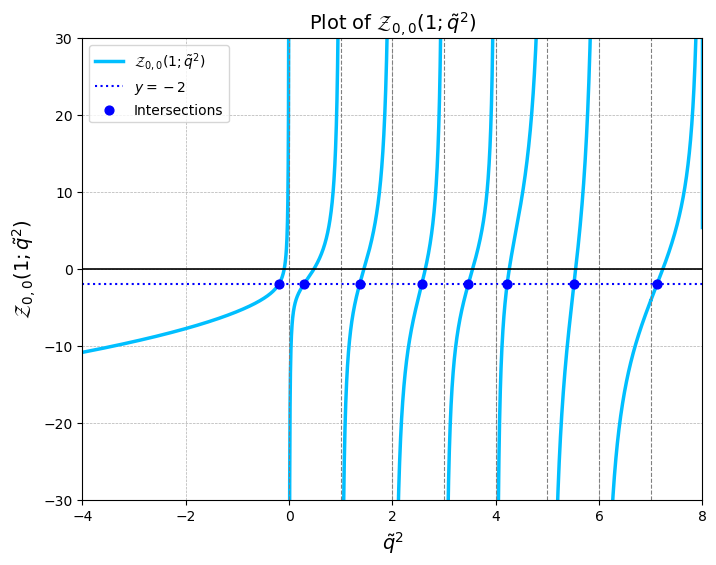

In [ ]:
# Compute
q2min, q2max, num_points = -4, 8, 5000
q2_values = np.linspace(q2min, q2max, num_points)
L_max, A = 40, 0.5
Z_values = compute_Z_values(q2_values, L_max)

# Compute intersections
intersections = get_intersections(q2_values, Z_values, A)

poles = np.array([0, 1, 2, 3, 4, 5, 6, 7])  # Remove unwanted solid vertical lines at poles
mask = np.any(np.abs(q2_values[:, None] - poles) < 5e-3, axis=1)
Z_values[mask] = np.nan  # NaN at poles
Z_masked = ma.masked_where(mask, Z_values)

plt.figure(figsize=(8, 6))
plt.plot(q2_values, Z_masked, color='deepskyblue', linewidth=2.5, label=r'$\mathcal{Z}_{0,0}(1; \tilde{q}^2)$')

# Horizontal line at -2
plt.axhline(-2, color='blue', linestyle='dotted', linewidth=1.5, label=r'$y = -2$')

if len(intersections) > 0:  # Intersections -> blue points
    plt.scatter(intersections, [-2] * len(intersections), color='blue', s=40, zorder=3, label="Intersections")

for n2 in poles:  # Dashed lines at the poles
    plt.axvline(n2, color='grey', linestyle='dashed', linewidth=0.8)

plt.axhline(0, color='black', linewidth=1.2)
plt.xlabel(r'$\tilde{q}^2$', fontsize=14)
plt.ylabel(r'$\mathcal{Z}_{0,0}(1; \tilde{q}^2)$', fontsize=14)
plt.title(r'Plot of $\mathcal{Z}_{0,0}(1; \tilde{q}^2)$', fontsize=14)
plt.ylim(-30, 30)
plt.xlim(q2min, q2max)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()
